In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [8]:
# Check for missing values
df['host_since'].isna().sum()

1

In [9]:
# Fill in missing values
from datetime import date
today = date.today()
df.fillna({'host_since': today}, inplace=True)

In [12]:
# Create a new column 'days_since_host' with the number of days since the host's first registered listing
df['days_since_host'] = (pd.to_datetime('today') - pd.to_datetime(df['host_since'])).dt.days

In [14]:
# Remove days_since_host outliers
Q1_dayshost = df['days_since_host'].quantile(0.25)
Q3_dayshost = df['days_since_host'].quantile(0.75)
IQR_dayshost = Q3_dayshost - Q1_dayshost

lower_bound_dayshost = Q1_dayshost - 1.5 * IQR_dayshost
upper_bound_dayshost = Q3_dayshost + 1.5 * IQR_dayshost

df = df[(df['days_since_host'] >= lower_bound_dayshost) & (df['days_since_host'] <= upper_bound_dayshost)]

<AxesSubplot:xlabel='days_since_host', ylabel='target'>

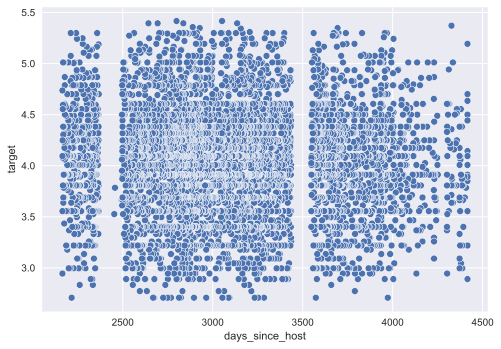

In [15]:
# Create a scatter plot of days_since_host vs target
sns.scatterplot(x='days_since_host', y='target', data=df)

<AxesSubplot:>

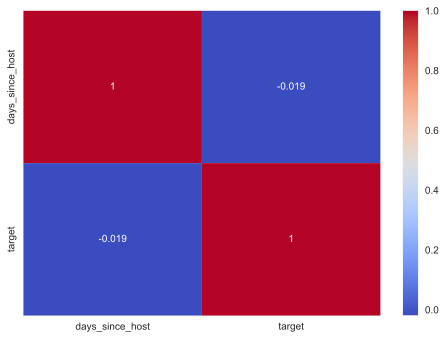

In [16]:
# Create a correlation plot of days_since_host and target
corr = df[['days_since_host', 'target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [18]:
from scipy.stats import pearsonr

# calculate the Pearson correlation coefficient and its p-value
corr, p_value = pearsonr(df['days_since_host'], df['target'])

print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

Pearson correlation coefficient: -0.019459404620487786
p-value: 0.12190363545721748


In [10]:
# Because of the reasons highlighted in this EDA, we have decided to NOT remove days_since_host
# as an attribute from our training set.